In [1]:
import torch
import sys
sys.path.insert(0, './core')
sys.path.insert(0, './models')
import DAELightTransferDataLoader as lightDL
import torchvision.utils as tutils
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
data_root = '../data/multipie_select_batches'

In [ ]:
training_data = []
training_data.append(data_root + '/session01_01_select')
training_data.append(data_root + '/session01_02_select')
training_data.append(data_root + '/session01_03_select')
training_data.append(data_root + '/session01_04_select')
training_data.append(data_root + '/session01_05_select')
training_data.append(data_root + '/session01_06_select')
training_data.append(data_root + '/session01_07_select')

transform = transforms.Compose([
            #transforms.Resize(),
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ])

data_set = lightDL.FareMultipieLightingTripletsFrontal(None, root=training_data, transform = None, resize=64)

print(len(data_set))

data_loader = torch.utils.data.DataLoader(data_set, batch_size = 64, shuffle = True)

['../data/multipie_select_batches/session01_01_select', '../data/multipie_select_batches/session01_02_select', '../data/multipie_select_batches/session01_03_select', '../data/multipie_select_batches/session01_04_select', '../data/multipie_select_batches/session01_05_select', '../data/multipie_select_batches/session01_06_select', '../data/multipie_select_batches/session01_07_select']
../data/multipie_select_batches/session01_01_select session01
../data/multipie_select_batches/session01_02_select session01
../data/multipie_select_batches/session01_03_select session01
../data/multipie_select_batches/session01_04_select session01
../data/multipie_select_batches/session01_05_select session01
../data/multipie_select_batches/session01_06_select session01
../data/multipie_select_batches/session01_07_select session01
Session:  session01


In [11]:
data = iter(data_loader)
s1, img1, s2, img2 = next(data)
print(img1.shape)

torch.Size([64, 3, 64, 64])


In [14]:
print(s2)
print(torch.tensor(s2))

('14', '03', '04', '16', '04', '10', '17', '13', '11', '16', '11', '18', '02', '03', '15', '10', '16', '04', '10', '13', '14', '12', '14', '11', '16', '03', '05', '18', '17', '05', '14', '08', '09', '13', '03', '04', '16', '10', '12', '03', '14', '05', '04', '14', '17', '17', '10', '04', '09', '12', '14', '01', '10', '13', '19', '09', '15', '03', '16', '13', '10', '08', '12', '10')


ValueError: too many dimensions 'str'

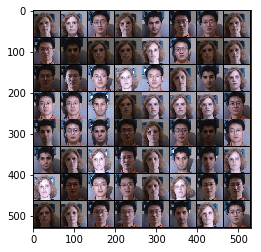

In [8]:
grid = tutils.make_grid(img1, nrow=8, padding=2)
# ndarr = grid.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
ndarr = grid.permute(1, 2, 0).cpu().numpy()
im = Image.fromarray(ndarr)
plt.imshow(im)
plt.show()

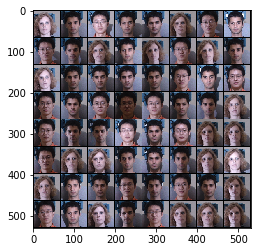

In [5]:
grid = tutils.make_grid(img2, nrow=8, padding=2)
#ndarr = grid.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
ndarr = grid.permute(1, 2, 0).cpu().numpy()
im = Image.fromarray(ndarr)
plt.imshow(im)
plt.show()